In [ ]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scvi
from pathlib import Path
plt.style.use('ggplot')

In [4]:
DATA = Path("../data")
MODEL = Path("../model")

In [ ]:
vae = scvi.model.SCVI.load(MODEL / "trained2.model")
adata = vae.adata

In [ ]:
de_aDNT = vae.differential_expression(adata, groupby='cell_type',group1='aDNT',group2='nDNT')
de_nDNT = vae.differential_expression(adata, groupby='cell_type',group1='nDNT',group2='aDNT')

In [7]:
adata_adnt = adata[adata.obs['cell_type'] == 'aDNT']
adata_ndnt = adata[adata.obs['cell_type'] == 'nDNT']

In [ ]:
adata_adnt.var['h2']= adata_adnt.var_names.str.startswith('H2')
adata_ndnt.var['h2']= adata_ndnt.var_names.str.startswith('H2')

In [9]:
sc.pp.calculate_qc_metrics(
    adata_adnt,
    qc_vars=['h2'],
    log1p=False,
    inplace=True,
    percent_top=None
)
sc.pp.calculate_qc_metrics(
    adata_ndnt,
    qc_vars=['h2'],
    log1p=False,
    inplace=True,
    percent_top=None
)

In [10]:
adata_adnt = adata_adnt[adata_adnt.obs['pct_counts_mt'] < 10, :]
adata_ndnt = adata_ndnt[adata_ndnt.obs['pct_counts_mt'] < 10, :]

In [11]:
adnt_var = adata_adnt.var.copy()
ndnt_var = adata_ndnt.var.copy()

In [12]:
adnt_h2 = adnt_var[adnt_var.index.str.startswith("H2")]
ndnt_h2 = ndnt_var[ndnt_var.index.str.startswith("H2")]

In [13]:
adnt_h2

,highly_variable,highly_variable_rank,means,variances,variances_norm,highly_variable_nbatches,h2,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
H2afz,True,178.0,5.753439,179.900863,3.096865,2,True,2400,15.724223,2.000817,38508.593750
H2afj,True,2134.0,2.105786,10.696688,0.838013,1,True,2241,13.737087,8.493263,33642.117188
H2afx,True,445.5,0.389012,1.987301,2.321433,2,True,1079,6.155235,55.941200,15074.170898
H2afv,True,1607.0,1.034911,4.070711,1.255047,2,True,1711,10.058274,30.134749,24632.669922
H2-Oa,True,2441.5,0.076953,0.101894,1.059235,2,True,71,0.387481,97.100857,948.941650
H2-DMa,True,1965.0,0.200740,0.338053,1.190547,2,True,516,2.952173,78.930176,7229.871582
H2-DMb1,True,351.5,0.010598,0.043840,3.001339,2,True,13,0.070777,99.469171,173.333618
H2-Ob,True,1698.0,0.086538,0.112017,1.059199,1,True,26,0.147491,98.938342,361.206482
H2-Ab1,True,15.0,0.083421,6.807762,11.485125,2,True,34,0.187414,98.611678,458.977997
H2-Aa,True,11.5,0.078434,5.492718,13.252440,2,True,5,0.028750,99.795835,70.407967


In [14]:
pct_counts = pd.DataFrame({
    'aDNT_pct_counts':adnt_h2['n_cells_by_counts'] / len(adata_adnt),
    'nDNT_pct_counts':ndnt_h2['n_cells_by_counts'] / len(adata_ndnt)
},index=adnt_h2.index)

In [ ]:

special_h2 = pct_counts[
    (pct_counts.index.str.endswith('DMa')) | 
    (pct_counts.index.str.endswith('Ab1')) | 
    (pct_counts.index.str.endswith('Eb1'))
   ]

special_h2_total = special_h2.sum(axis=0).to_numpy()

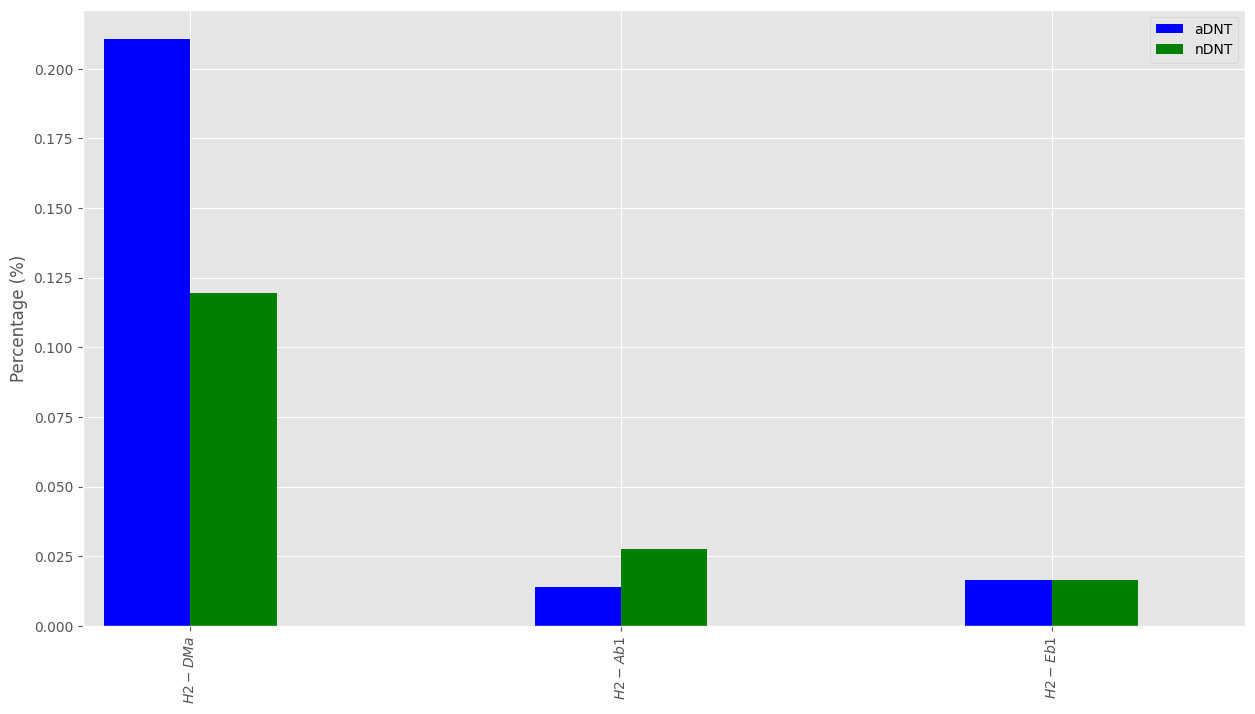

In [16]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize = (15,8))
special_h2['aDNT_pct_counts'].plot(kind='bar',color='blue',ax=ax,width=0.2,position=1,label='aDNT',)
special_h2['nDNT_pct_counts'].plot(kind='bar',color='green',ax=ax,width=0.2,position=0,label='nDNT')
ax.set_ylabel("Percentage (%)")
ax.set_xticklabels(labels = ["$H2-DMa$",'$\it{H2-Ab1}$','$\it{H2-Eb1}$'],)
ax.legend()
plt.show()